# Sayurbox - Data Scientist Take-Home Test
This task uses the `online-test-dataset.csv`

First, I would like to start with the EDA (exploratory data analysis) before jumping straight on to the training/evaluation sets split and model building

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
raw_data = pd.read_csv('./data/online-test-dataset.csv')
print('Number of rows:', len(raw_data))
raw_data.head()

Number of rows: 858220


,date,store,item,sales
0,1/1/13,1,1,13.0
1,1/2/13,1,1,11.0
2,1/3/13,1,1,14.0
3,1/4/13,1,1,13.0
4,1/5/13,1,1,10.0


## EDA

I think it is the best practice to not make any addition/changes on the original or raw dataset. That is why I copied the entire `DataFrame` to a new variable

In [143]:
df = raw_data.copy()

The easiest and quickest way to get the summary of our data is by using the `.describe()` method. Note that it only applies to numerical data types and not `object` data types

In [144]:
df.describe()

,store,item,sales
count,858220.000000,858220.000000,848302.000000
mean,5.500000,24.000000,52.754637
std,2.872283,13.564668,29.116697
min,1.000000,1.000000,0.000000
25%,3.000000,12.000000,30.000000
50%,5.500000,24.000000,47.000000
75%,8.000000,36.000000,70.000000
max,10.000000,47.000000,231.000000


It is a good practice to always check the data types we are dealing with to match between the types and their values (e.g. `sales` column usually has a `float` or `int`, not `object` data types like string)

In [145]:
print('Number of columns:', len(df.columns))
print(df.dtypes)

Number of columns: 4
date      object
store      int64
item       int64
sales    float64
dtype: object


Most data science projects deal with structured and unstructured data. In the case of structured data (table), the data is often populated by empty/null (indicated by `NaN` values). Before doing our analysis, we can count how many of them inside each column. This dataset has 9918 empty values inside the `sales` column. Considering that the number of rows in our data is 858,220, I think that these values can be ignored because it only accounts for 0.01% of the whole data

In [146]:
for c in df.columns:
    print('Number of null/empty values in column "{}": {}'.format(c, df[c].isnull().sum()))

Number of null/empty values in column "date": 0
Number of null/empty values in column "store": 0
Number of null/empty values in column "item": 0
Number of null/empty values in column "sales": 9918


### Data Visualization

Performing data visualization makes the data exploration more understandable and easier to notice if there exist any interesting insights from the data.

In [147]:
# labelling function
def autolabel(plot, font_size=12):
    for p in plot:
        h = p.get_height()
        ax.annotate('{}'.format(h), fontsize=font_size,
                   xy=(p.get_x() + p.get_width()/2, h),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center', va='bottom')

To start, let's take a look at the number of stores in the data. Since the values are from 0 to 9, think of it as the name of the store replaced by those numbers.

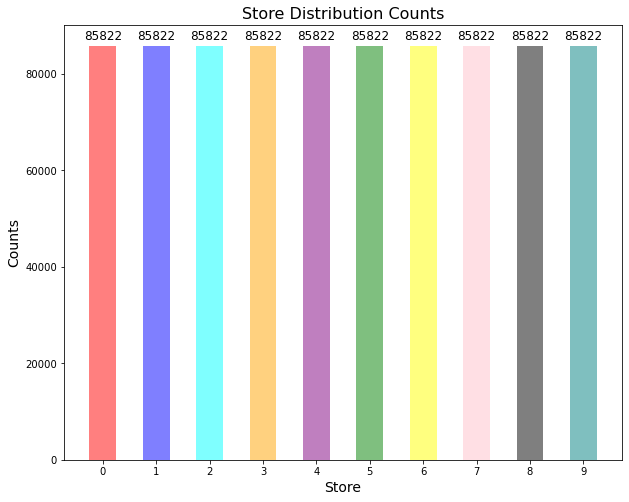

In [148]:
df_store = df[['store']].value_counts()
df_store = pd.pivot_table(df_store.to_frame(), values=0, index=[0,1,2,3,4,5,6,7,8,9], aggfunc=np.sum)
df_store = df_store.reset_index()
df_store  = df_store.rename(columns={'index':'store', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(10)
width = 0.5
# sns.barplot(data=df_store, x='store', y='Counts')
bar = ax.bar(x, df_store['Counts'], color=['red','blue','cyan','orange','purple','green','yellow','pink','black','teal'], alpha=.5, width=width)

ax.set_title('Store Distribution Counts', fontsize=16)
ax.set_xlabel('Store', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

autolabel(bar)

plt.show()

There is no interesting information about this visualization. There are 85822 stores from each store 1 to 9.

Next, let's take a look at the item distribution count. Similar to the previous one, items are indicated by integers from 1 to 47. This time, I use `seaborn` to distinguish different colors for 47 various items.

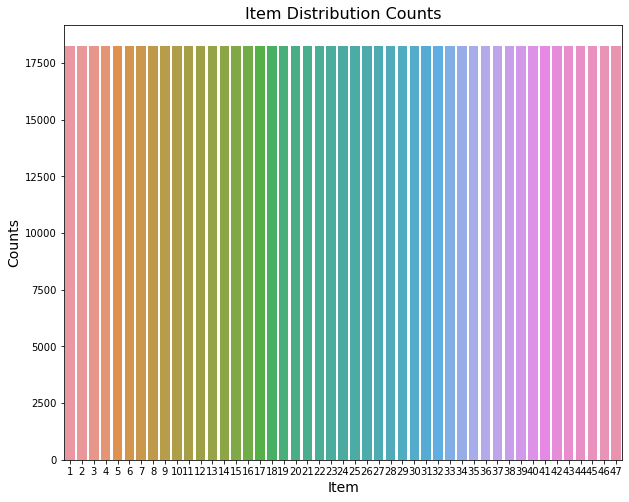

In [149]:
df_item = df[['item']].value_counts()
df_item = pd.pivot_table(df_item.to_frame(), values=0, index=np.arange(1,48), aggfunc=np.sum)
df_item = df_item.reset_index()
df_item  = df_item.rename(columns={'index':'item', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(47)
width = 0.5
sns.barplot(data=df_item, x='item', y='Counts')
# bar = ax.bar(x, df_item['Counts'], color=['red','blue','cyan','orange','purple','green','yellow','pink','black','teal'], alpha=.5, width=width)

ax.set_title('Item Distribution Counts', fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

Still, we still can't find any insightful findings that we can use to make our hypothesis. All items are distributed evenly across 47 items.

Next, let's take a look at the sales in multiple items and stores.

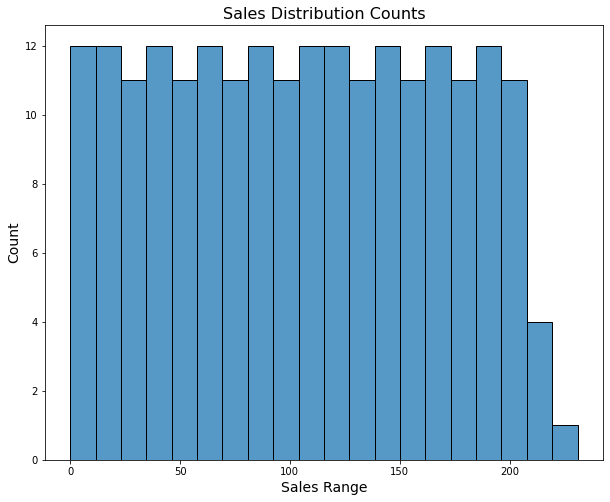

In [150]:
df_sales = df[['sales']].value_counts()
df_sales = df_sales.reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df_sales, x='sales', bins=20, ax=ax)

ax.set_title('Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Sales Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

The histogram above shows the sales range from 0 up to 200. By increasing the size of the bins (`bins=20`), we can see those distribution in more details. The other way to visualize this is by plotting a boxplot. Boxplot plots values by considering quartile values. The left side indicates the 1st quartile, middle for 2nd quartile, and finally right side for 3rd quartile.

C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


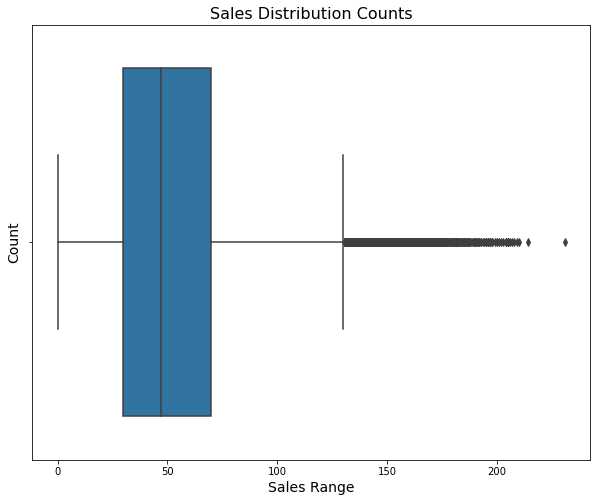

In [151]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(df['sales'])

ax.set_title('Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Sales Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

Notice that on the most right side of the boxplot, we can see that the points are not neighboring. This is what we usually call **outliers**. Simply said, outliers are the values that are abnormal in a population. In this example, sales exceeding 200 can be considered as outliers. For most of the case, we should not ignore outliers. These values might give us hidden business insights on why the values exist. Outliers can also happen as a result of human or system error (e.g. a sales person who incorrectly input the values to the database).

In the worst case, outliers can also hurt the performance of our prediction model. This is the situation where we must look into and investigate them. Nevertheless, let's carry on the data exploration without worrying too much about outliers.

### Feature Engineering
>Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.<br>
-Wikipedia (https://en.wikipedia.org/wiki/Feature_engineering#:~:text=Feature%20engineering%20is%20the%20process,as%20applied%20machine%20learning%20itself)

To put it simply, feature engineering is a method to add or create more features from the existing features. Let's see what it looks like.
Remember that the dataset has `date` column in it. Let's say that our superiors requested a report about sales trend from 2014 to 2017. We can directly use the `date` column to extract and group the sales by year. However, that is not effective because the format of the date can change depending on the data itself. Therefore, we need to feature engineere the `date` column into several new columns.

In [152]:
import datetime

# feature engineer the 'date' column into 4 new columns
df['Date'] = pd.to_datetime(df_copy['date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [153]:
df.head()

,date,store,item,sales,Date,day,month,year
0,1/1/13,1,1,13.0,2013-01-01,1,1,2013
1,1/2/13,1,1,11.0,2013-01-02,2,1,2013
2,1/3/13,1,1,14.0,2013-01-03,3,1,2013
3,1/4/13,1,1,13.0,2013-01-04,4,1,2013
4,1/5/13,1,1,10.0,2013-01-05,5,1,2013


Now we can use the `Date`, `day`, `month`, and `year` columns to work with our data exploration.

First, let's take a look at our yearly sales

In [154]:
yearly_sales = []
for y in df['year'].unique():
    yearly_sales.append(df.loc[df['year'] == y, 'sales'].sum())
    
df_yearly_sales = pd.DataFrame({'year': df['year'].unique(), 'total_sales': yearly_sales})
df_yearly_sales

,year,total_sales
0,2013,7427851.0
1,2014,8543795.0
2,2015,8960093.0
3,2016,9729859.0
4,2017,10090266.0


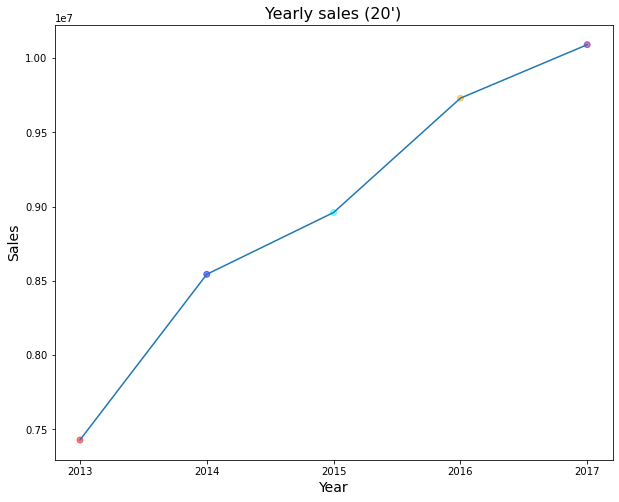

In [155]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['year'].unique()
width = 0.5
sns.lineplot(data=df_yearly_sales, x='year', y='total_sales')
bar = ax.scatter(x, df_yearly_sales['total_sales'], c=['red','blue','cyan','orange','purple'], alpha=.5)

ax.set_title("Yearly sales (20')", fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.set_xticks(x)

plt.show()

<b>It is important that as a data scientist, we do not draw any conclusions from the exploratory data analysis part. However, it is plausible to make a hypothesis that we can test when building the prediction model.</b>

Our initial thoughts might clear that the sales increased for each year across 5 years from 2013 until 2017. We are still unsure about the upward trend and we can make our hypothesis that in the following year (2018), sales might still slightly increase.

Next, let's take a look at the monthly sales. Note that I combined all month sales from all years and sum them up all together. It will take too much space if I split each year into 12 different figures. I might end up with approximately 12x5=60 figures!

In [156]:
monthly_sales = []
for m in df['month'].unique():
    monthly_sales.append(df.loc[df['month'] == m, 'sales'].sum())
    
df_monthly_sales = pd.DataFrame({'month': df['month'].unique(), 'total_sales': monthly_sales})
df_monthly_sales

,month,total_sales
0,1,2583278.0
1,2,2603956.0
2,3,3438432.0
3,4,3879630.0
4,5,4298154.0
5,6,4433301.0
6,7,4870368.0
7,8,4295726.0
8,9,3874209.0
9,10,3723728.0


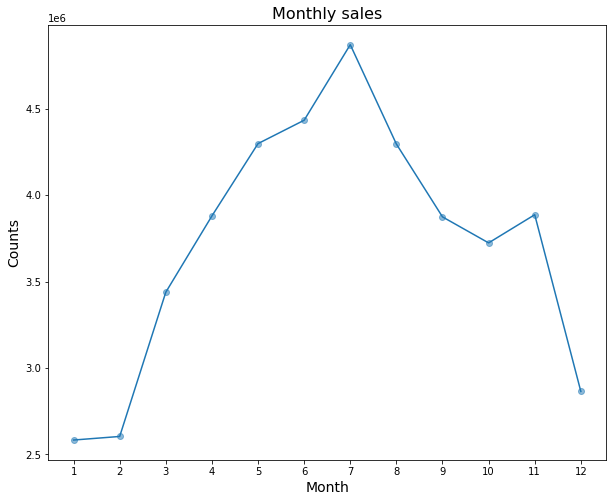

In [157]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['month'].unique()

sns.lineplot(data=df_monthly_sales, x='month', y='total_sales')
bar = ax.scatter(x, df_monthly_sales['total_sales'], alpha=.5)

ax.set_title("Monthly sales", fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

Surprisingly, sales significantly increased from February to May, and topped the chart in July. We can do further investigation by plotting the sales for each item. By doing this, we can have a rough idea which items are responsible for that sudden sales increase.

Start off by calculating overall item sales throughout the year (from 2013 to 2017)

In [158]:
# calculate overall item sales from 2013 to 2017
overall_item_sales = []
for i in df['item'].unique():
    overall_item_sales.append(df.loc[df['item'] == i, 'sales'].sum())
    
df_overall_item_sales = pd.DataFrame({'item': df['item'].unique(), 'total_sales': overall_item_sales})

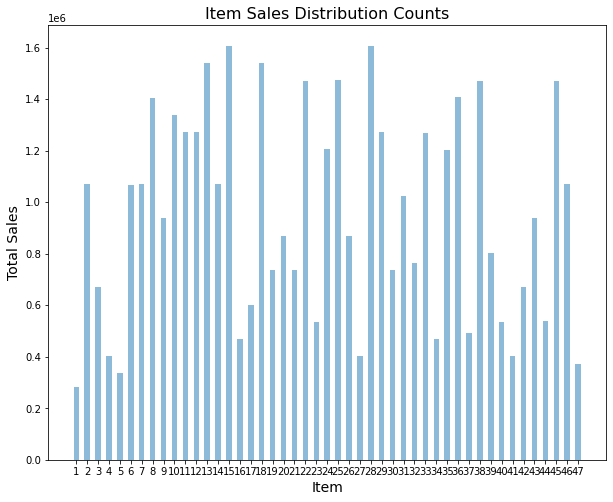

In [159]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['item'].unique()
width = 0.5
bar = ax.bar(x, df_overall_item_sales['total_sales'], alpha=.5, width=width)

ax.set_title('Item Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_xticks(x)

plt.show()

From the figure above, item 15 and 28 mostly contribute to the sales among other items.

Let's look into more details by investigating the July item sales.

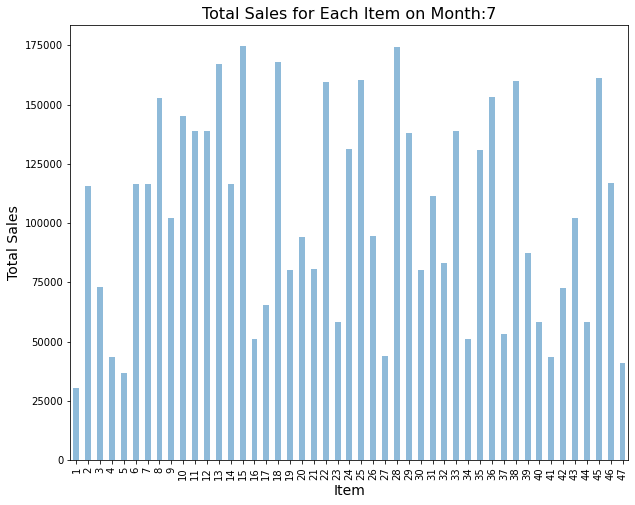

In [164]:
df_item_sales_month = df[['item', 'sales', 'month']]
df_item_sales_month = df_item_sales_month.groupby(by=['month', 'item']).sum()
df_item_sales_month = df_item_sales_month.reset_index()

# set the month to July
month_idx = 7
x = df_item_sales_month['item'].unique()
# fig, ax = plt.subplots(figsize=(10,8))
df_temp = df_item_sales_month[df_item_sales_month['month'] == month_idx]
# sns.barplot(data=df_temp, x='item', y='sales')
df_temp.plot(kind='bar', x='item', y='sales', legend=None, alpha=.5, figsize=(10,8))

plt.title('Total Sales for Each Item on Month:{}'.format(month_idx), fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.show()

As expected, item 15 and 28 achieved approximately 170,000 sales each that contributes to the high sales in July.

We can also plot the item sales in each year

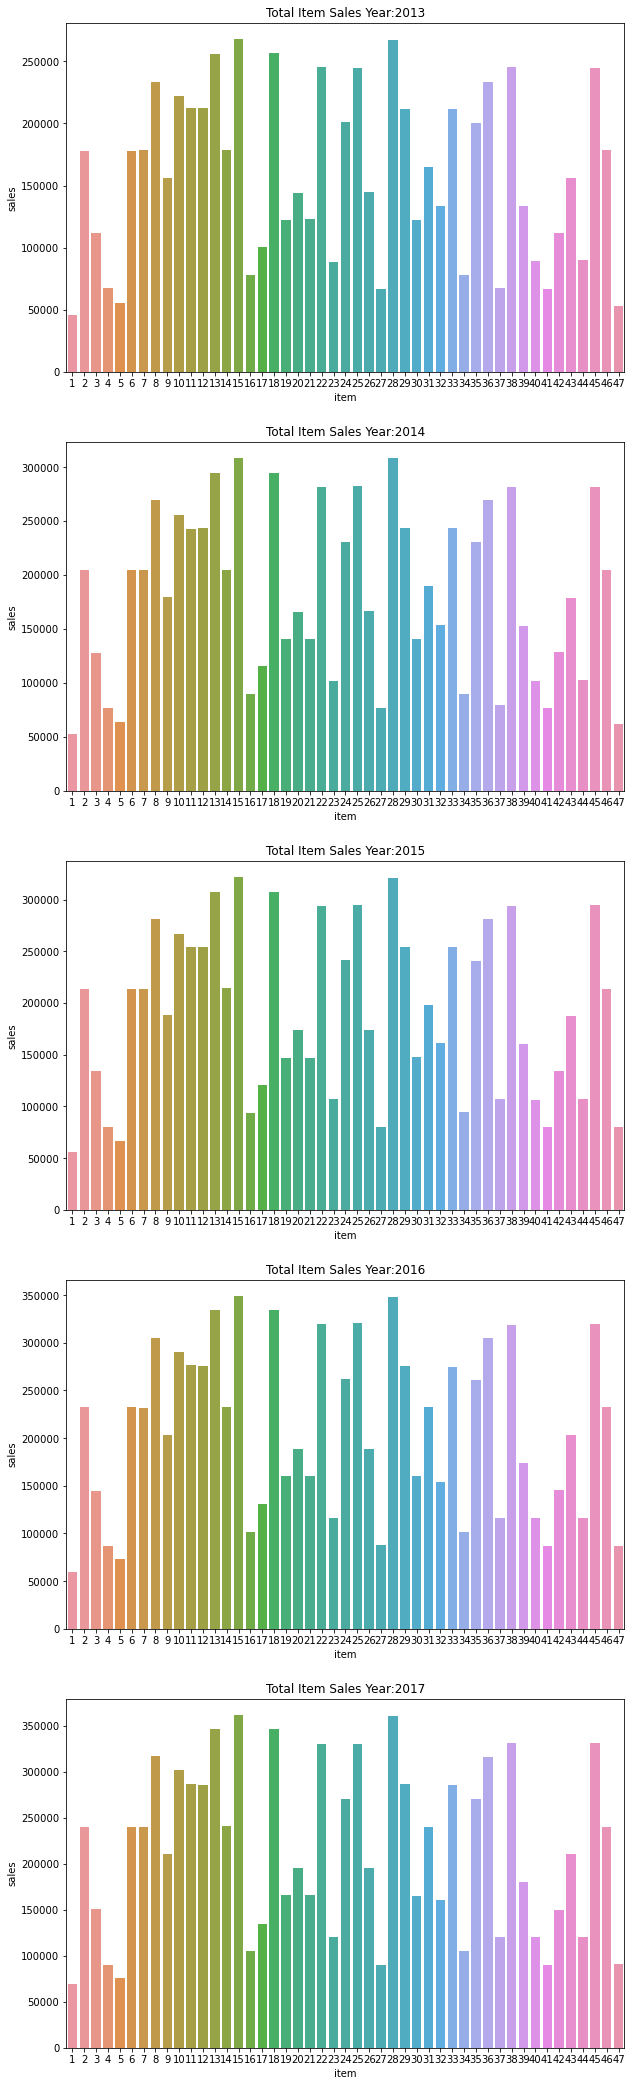

In [21]:
df_item_sales_year = df[['item', 'sales', 'year']]
df_item_sales_year = df_item_sales_year.groupby(by=['year', 'item']).sum()
df_item_sales_year = df_item_sales_year.reset_index()

years = df_item_sales_year['year'].unique()
nrows = 5
ncols = 1
cnt = 1

fig = plt.figure(figsize=(10,15))
for i in years:
    plt.subplot(nrows, ncols, cnt)
    plt.title('Total Item Sales Year:20{}'.format(i))
    plt.xlabel('item')
    sns.barplot(x='item', y='sales', data=df_item_sales_year[df_item_sales_year['year']==i])
    cnt = cnt + 1

plt.subplots_adjust(top=2)
plt.show()

We cannot really extract any information from these plots because they are similar to each other. However, if you notice on the y axis (sales), you will see the upper range keeps increasing from 250,000 in 2013 to 350,000 in 2017. This reflects the figure we plot earlier about the yearly sales where it shows an upward trend.

# Building Forecasting Model

In [63]:
import datetime
import statsmodels.api as sm

df_copy = raw_data.copy()

sales_avg = df_copy['sales'].mean()
df_copy = df_copy.fillna(value=sales_avg, axis=1)

df_copy['Date'] = pd.to_datetime(df_copy['date'])

In [64]:
item = 1
store = 1

df_item_store = df_copy[(df_copy['item']==item) & (df_copy['store']==store)]
to_drop = ['date', 'store', 'item']
df_item_store = df_item_store.drop(to_drop, axis=1)

y = df_item_store.set_index('Date')
y.head()

,sales
Date,
2013-01-01,13.0
2013-01-02,11.0
2013-01-03,14.0
2013-01-04,13.0
2013-01-05,10.0


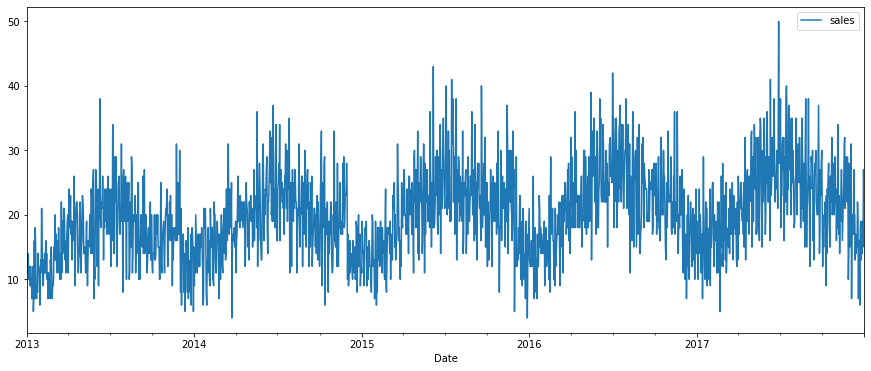

In [65]:
y.plot(figsize=(15,6))

plt.show()

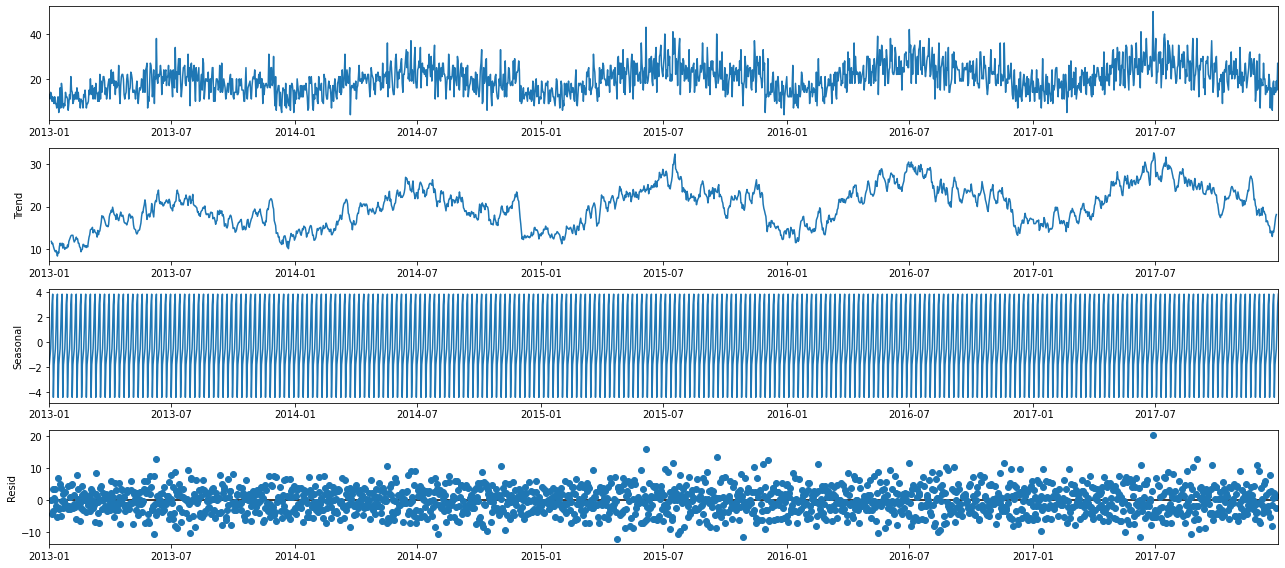

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [67]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
y_train = y[:'2017-01-01']
y_test = y['2017-01-01':]
print(len(y_train))
print(len(y_test))

1462
365


In [69]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train, order=param, seasonal_order=param_seasonal, enforce_stationary=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12982.67127325659


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11777.101697825234
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9952.4490311974


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9379.734037264725
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10006.133387706932


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9479.61714394137
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9636.145663466636


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9381.654758196051
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11724.187060522618


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:11069.215098271176
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9926.398265506563


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:9310.31675598749


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9959.517402728194


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:9406.460433695032


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:9590.660871727618


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:9301.283148773662
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:9798.369042142069
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9799.45679689765
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:10763.506430046606


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\en

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:9783.986465824994
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:9799.516422332043


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:9782.331856852812
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:10353.309123331126


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:9785.434630797536
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:9016.439969776635


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:9014.140024040149


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:9955.792464266828


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:9008.669097523441


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:9015.127838143786


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:9004.503364124328


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:9635.601048386749


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:9007.871255470829
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:9766.726531516286


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:9768.699762750468
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:9932.973056442623


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:9289.727519297046


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:9768.699780119528


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:9385.579859708012


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:9593.404906546635


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:9271.53863303788


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:9026.497193550818


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:9024.202402441497
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:9919.81570200877


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:9007.200328931143


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:9025.18807029826


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:9029.972634073489


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:9592.660611526717


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:9006.466578535666
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:9506.522194922749


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:9494.078731430338
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:10557.63757341095


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:9493.567113284593
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:9496.552914765321


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:9485.110115411231


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:10131.471062376453


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:9484.546596610828
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:9011.523511720707


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:9010.571787289631


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:9936.088515902047


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:9004.03000790353


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:9011.183345045658


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:8999.97307391982


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:9597.31488175601


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:9004.117289347567


In [70]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0598      0.030      2.021      0.043       0.002       0.118
ma.L1         -0.9097      0.013    -71.935      0.000      -0.935      -0.885
ar.S.L12       0.4933      0.186      2.648      0.008       0.128       0.858
ma.S.L12      -0.5772      0.175     -3.293      0.001      -0.921      -0.234
sigma2        27.7593      0.964     28.793      0.000      25.870      29.649


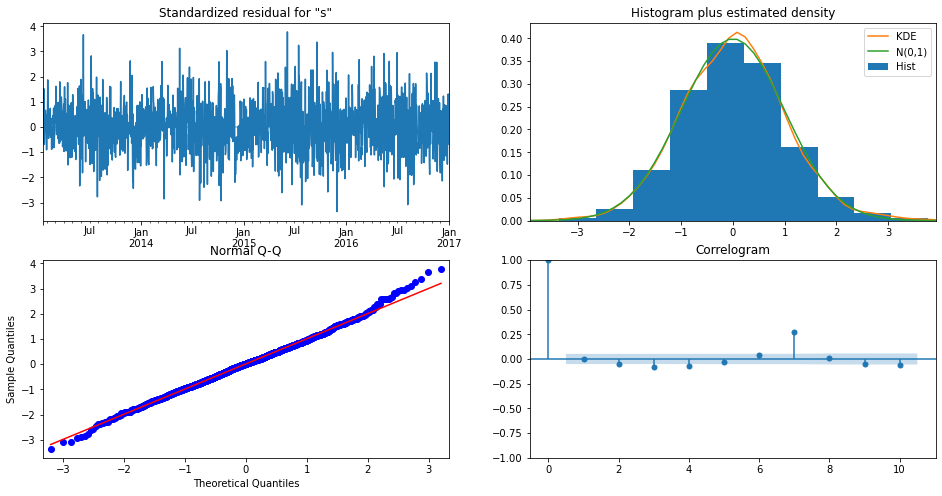

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

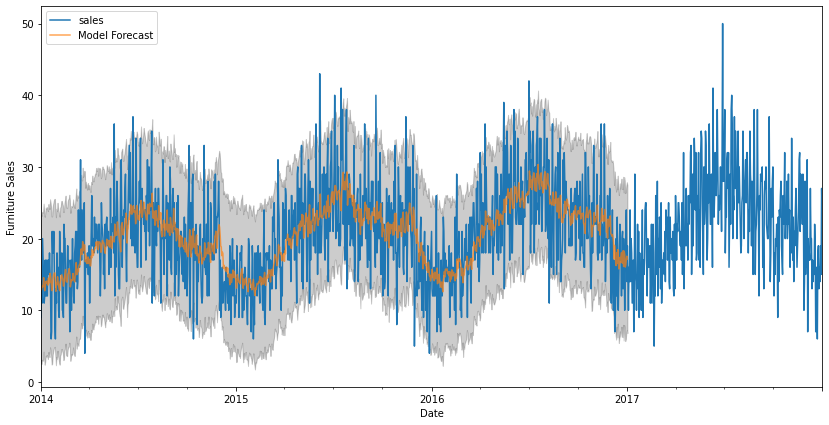

In [81]:
train_preds = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = train_preds.conf_int()
ax = y['2014':].plot(label='observed')
train_preds.predicted_mean.plot(ax=ax, label='Model Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

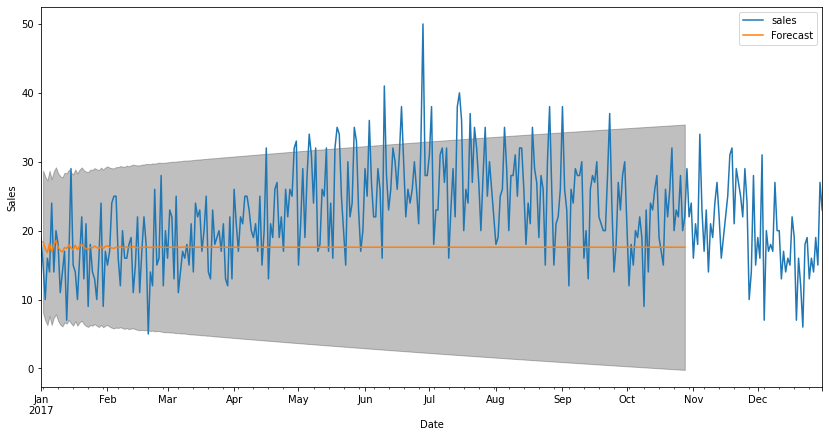

In [78]:
pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int()
ax = y_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [103]:
test_preds = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False, end=pd.to_datetime('2017-12-31'))
y_forecasted = test_preds.predicted_mean.values
y_truth = y_test.values[:,0]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 69.28
The Root Mean Squared Error of our forecasts is 8.32


In [44]:
df_copy = raw_data.copy()

sales_avg = df_copy['sales'].mean()
df_copy = df_copy.fillna(value=sales_avg, axis=1)

df_copy['Date'] = pd.to_datetime(df_copy['date'])
item = 1
store = 1

df_item_store = df_copy[(df_copy['item']==item) & (df_copy['store']==store)]
to_drop = ['date', 'store', 'item']
df_item_store = df_item_store.drop(to_drop, axis=1)

y = df_item_store.set_index('Date')
y_train = y[:'2017-01-01']
y_test = y['2017-01-01':]

In [46]:
from fbprophet import Prophet

y_train = y_train.reset_index()
y_train = y_train.rename(columns={'Date': 'ds', 'sales': 'y'})
y_test = y_test.reset_index()
y_test = y_test.rename(columns={'Date': 'ds', 'sales': 'y'})

prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(y_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
forecast = prophet_model.make_future_dataframe(periods=36, freq='MS')
forecast = prophet_model.predict(forecast)

<Figure size 1296x432 with 0 Axes>

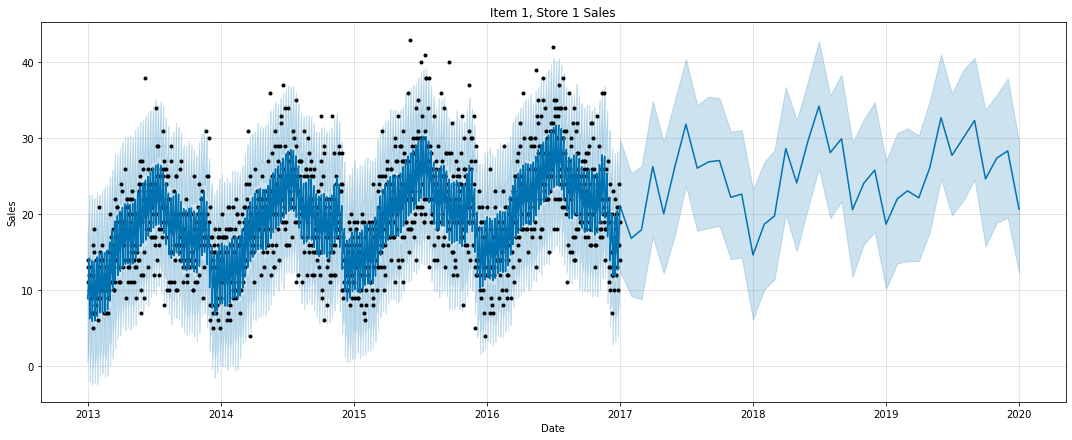

In [54]:
plt.figure(figsize=(18, 6))
prophet_model.plot(forecast, xlabel = 'Date', ylabel = 'Sales', figsize=(15,6))
plt.title('Item {}, Store {} Sales'.format(item, store));

plt.show()

In [58]:
y_forecasted = forecast['yhat'].loc[:364]
y_truth = y_test.values[:,0]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 38200.88
The Root Mean Squared Error of our forecasts is 195.45


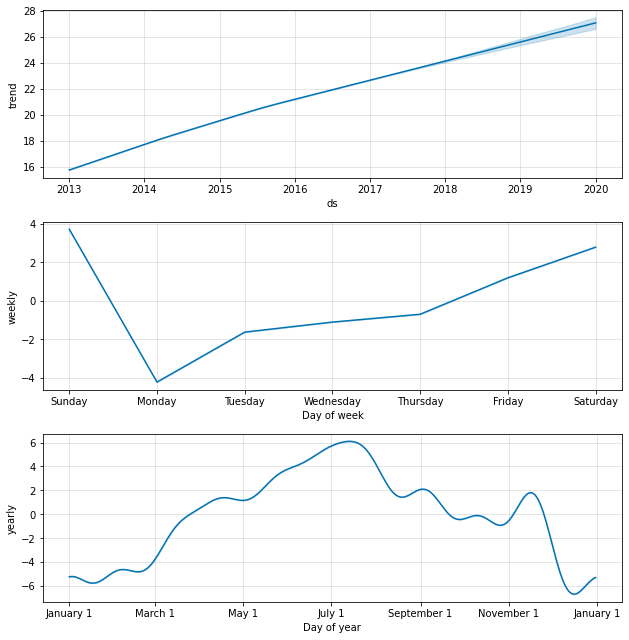

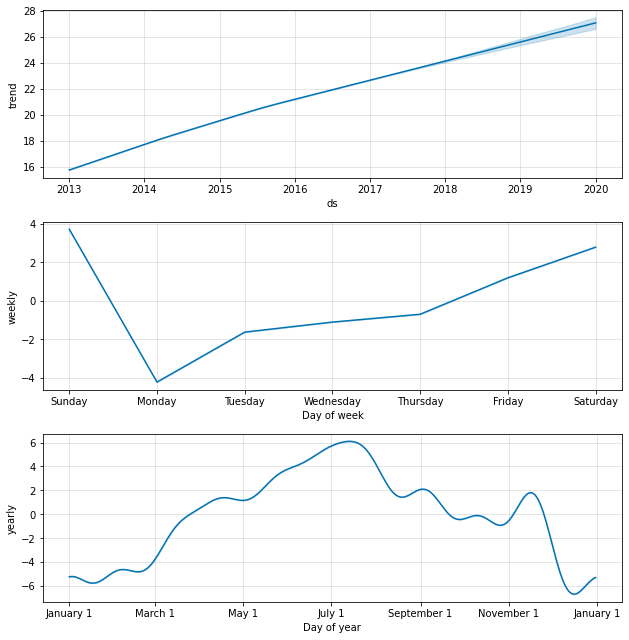

In [59]:
prophet_model.plot_components(forecast)